In [4]:
import plotly.express as px
import cv2 as cv

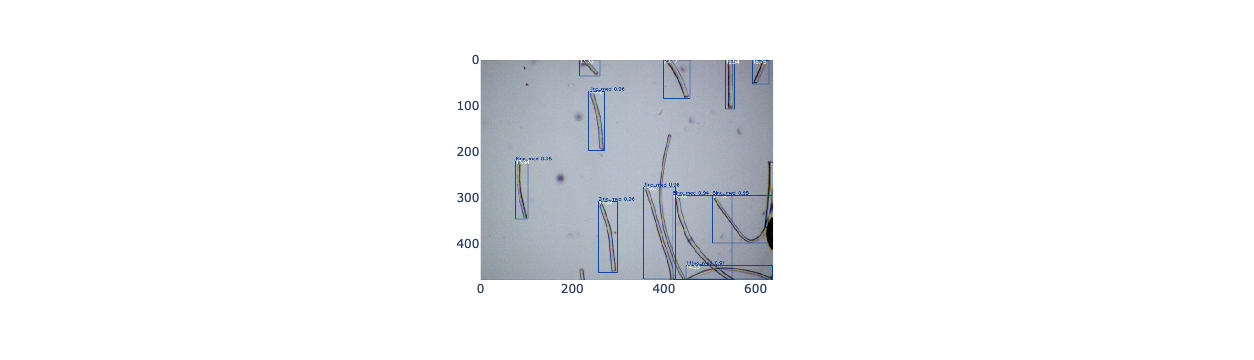

In [7]:
img = cv.imread('C_1_3.png')
img = img[:,:,::-1]
fig = px.imshow(img)
fig.show()

In [8]:
img.shape

(480, 640, 3)

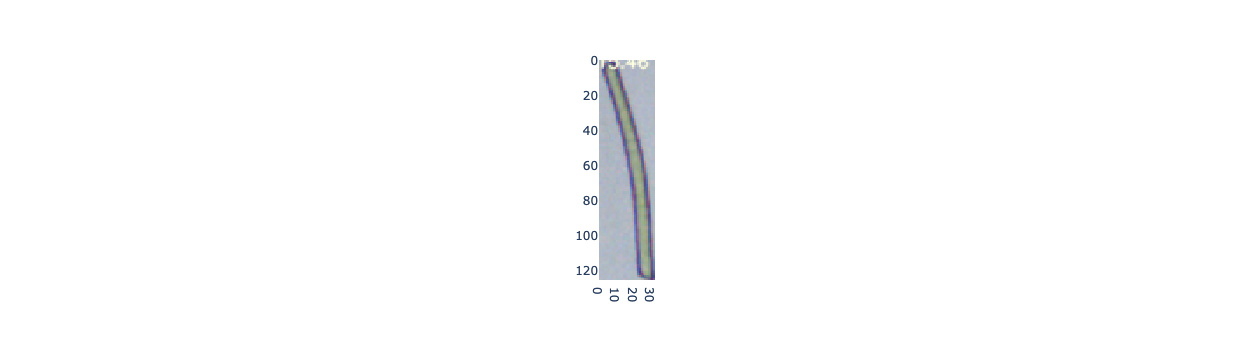

In [12]:
x1,y1 = 238,70
x2,y2 = 270,196

cropped = img[y1:y2,x1:x2]

px.imshow(cropped).show()

In [16]:
def cropImage(img, bbox):
    x1,y1 = bbox[0],bbox[1]
    x2 = x1 + bbox[2]
    y2 = y1 + bbox[3]
    return img[y1:y2,x1:x2]

In [13]:
import json

[200, 102, 83, 94]


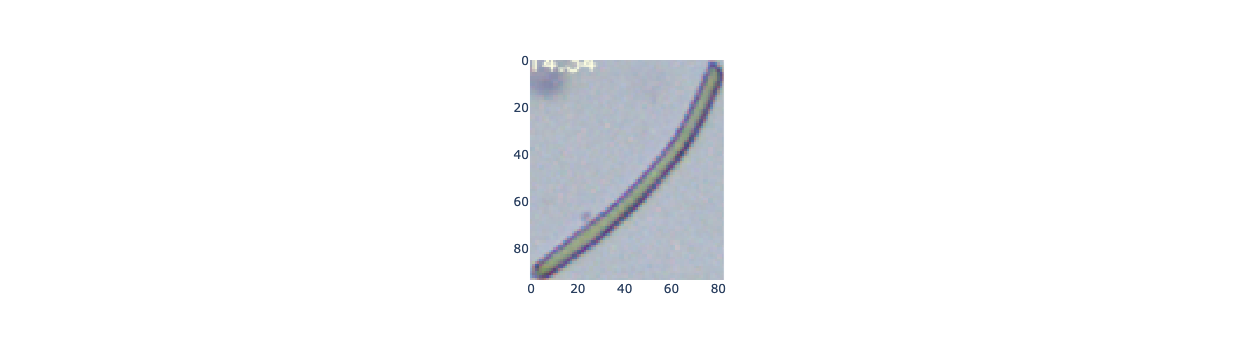

In [18]:
img = cv.imread('C_1_30.png')
img = img[:,:,::-1]

json_file = open('_annotations.coco.json')

data = json.load(json_file)

for i in data['annotations']:
    
    print(i['category_id'])
    cropped = cropImage(img, i['bbox'])
    px.imshow(cropped).show()
    
json_file.close()

In [25]:
json_file = open('train/_annotations.coco.json')
data = json.load(json_file)
json_file.close()

In [26]:
# dataset

# por cada anotacion:
    # obtener la imagen correspondiente
    # obtener el recorte 
    # guardar en una carpeta con el nombre de su etiqueta
    

categorias = [category['name'] for category in data['categories']]

print(categorias)

['fibras', 'c', 'frag', 'no_med']


In [27]:
images = [image['file_name'] for image in data['images']]

print(images)

['C_1_105_png.rf.4cb691690eeeb143236b39ab97f2a413.jpg', 'C_1_93_png.rf.29a9eab05504cea8a966f3cdf754677f.jpg', 'C_1_30_png.rf.6be4947fea613cec08907cba430afad4.jpg']


In [29]:
from pathlib import Path

In [33]:
for annotation in data['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    print(f'save crop from image: {images[image_id]} at folder: {categorias[category_id]}')
    
    img = cv.imread(f'train/{images[image_id]}')
    img = img[:,:,::-1]
    
    cropped = cropImage(img, annotation['bbox'])
    
    dir_path = f'data/train/{categorias[category_id]}'
    
    Path(dir_path).mkdir(parents=True, exist_ok=True)
    
    filename = str(annotation['id']).zfill(4) + '.jpg'
    
    cv.imwrite(dir_path + '/' + filename, cropped[:,:,::-1])
    

save crop from image: C_1_105_png.rf.4cb691690eeeb143236b39ab97f2a413.jpg at folder: no_med
save crop from image: C_1_105_png.rf.4cb691690eeeb143236b39ab97f2a413.jpg at folder: no_med
save crop from image: C_1_93_png.rf.29a9eab05504cea8a966f3cdf754677f.jpg at folder: c
save crop from image: C_1_93_png.rf.29a9eab05504cea8a966f3cdf754677f.jpg at folder: frag
save crop from image: C_1_30_png.rf.6be4947fea613cec08907cba430afad4.jpg at folder: no_med
save crop from image: C_1_30_png.rf.6be4947fea613cec08907cba430afad4.jpg at folder: no_med
save crop from image: C_1_30_png.rf.6be4947fea613cec08907cba430afad4.jpg at folder: no_med
